# Simpson's method for integration

Simpson's method for integration approximates a given curve using a number of quadratic interpolations.

The Simpson's 1/3 rule takes 3 consecutive points on the curve of the function and represents each of those points with a quadratic function to evaluate the area under the curve. This process is repeated for each points, taking 3 consecutive points at a time.

![resources/simpson-1.png](resources/simpson-1.png)

The result of the integration after evaluations is given by,

$$\int_a^b f(x)dx \approx \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + \dots + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n) \right]$$

## Code

In [1]:
from numpy import cos, empty, pi, sin, exp, square
from matplotlib import pyplot as plt

# Default configuaration for matplotlib
plt.style.use(['science', 'ieee'])
plt.rcParams["figure.figsize"] = (10, 5)


In [2]:
# Function to generate `n` evenly spaced points between limits `a` and `b`
def generate_points(a, b, n, retstep=False):

    # Calculating the spacing (difference) between each points
    h = (b - a) / (n - 1)

    # Creating an empty array to store the points
    points = empty(n)

    # Generating the points
    for i in range(n):
        points[i] = a
        a += h

    # Returning the difference between each points if asked for
    if retstep:
        return points, h

    return points


In [3]:
# Importing code for Simpson's method for integration
def integrate_simpson(f, a, b, n):

    # Checking if interation using Simpson's method is possible
    if n % 2 == 0 or n < 2:
        raise ValueError(
            "Intergration using Simpson's method can only be evaluated for odd number of points greater than 2!")

    # Generating points
    x, h = generate_points(a, b, n, retstep=True)

    # Evaluating the function `f(x)` for each points
    y = f(x)

    # Declaring a variable to store the integral
    integral = 0

    # Evaluating the integral using Simpson's method
    for i in range(n):
        if i == 0 or i == (n - 1):
            integral += y[i]
        elif i % 2 == 0:
            integral += y[i] * 2
        elif i % 2 == 1:
            integral += y[i] * 4

    integral *= (h / 3)

    return integral


## Examples

### $$\int_{0}^{2\pi} sin(x) \cdot dx$$

In [4]:
def f(x):
    return sin(x)


x_i = 0
x_f = 2 * pi
n = 1001


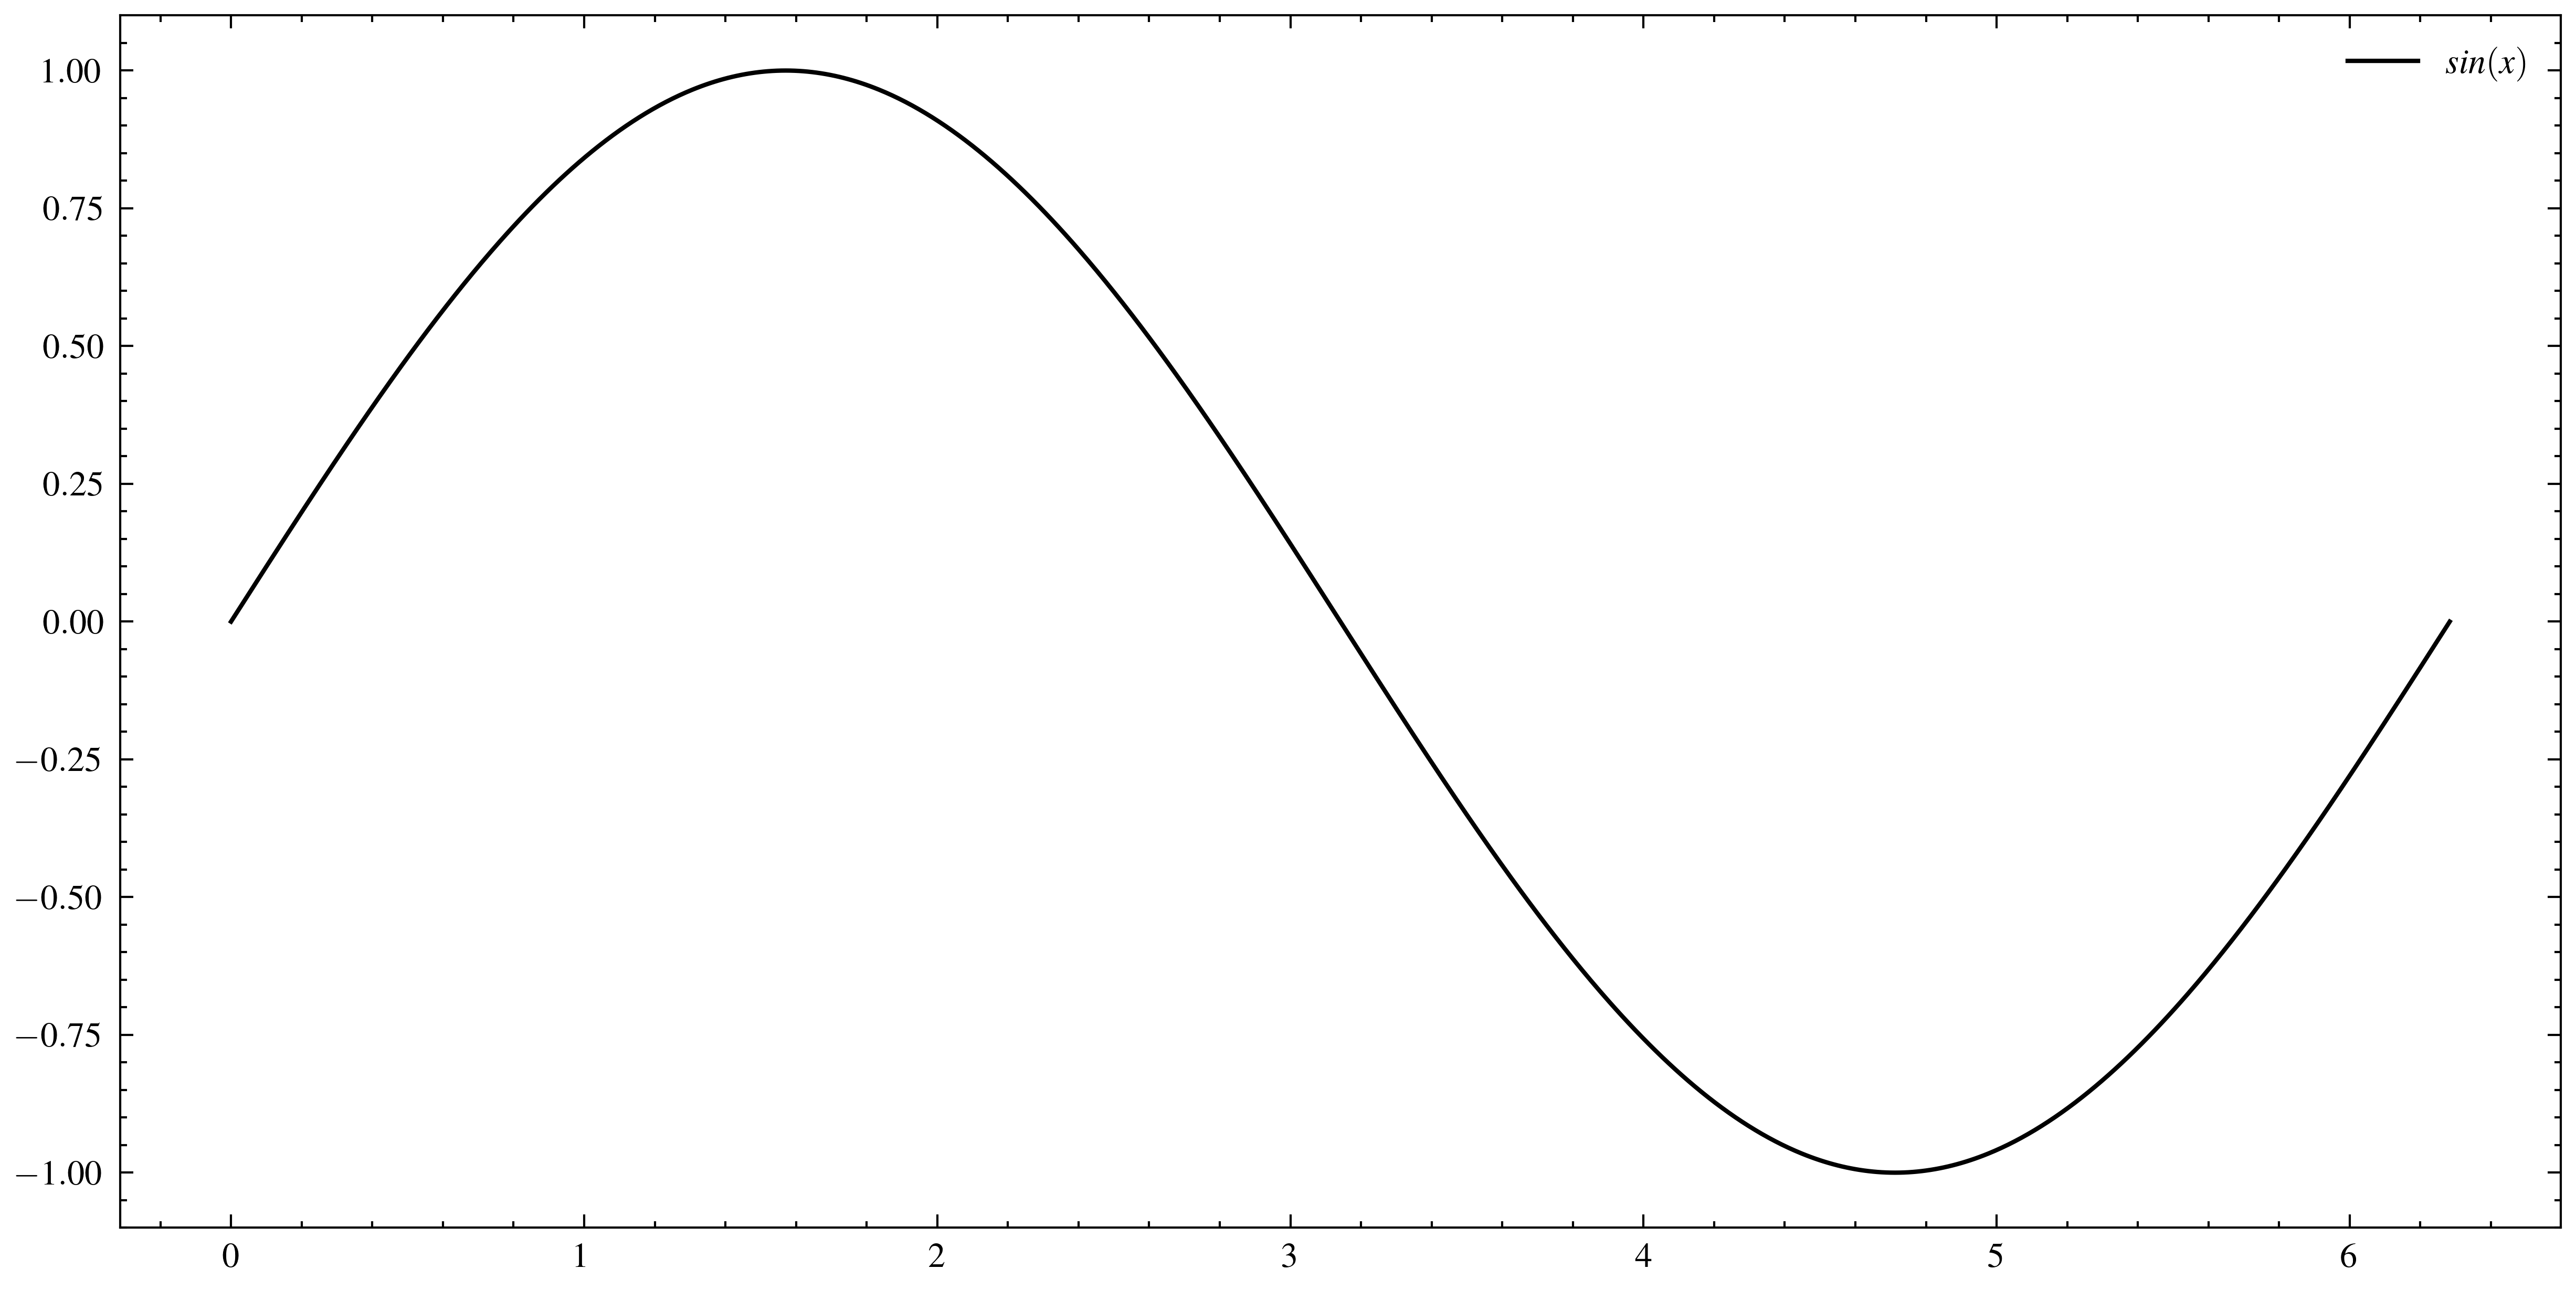

In [5]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$sin(x)$")
plt.legend()
plt.show()


In [6]:
integrate_simpson(f, x_i, x_f, n)


-1.1860553938477683e-13

### $$\int_{-\pi}^{\pi} e^{-x^2} \cdot dx$$

In [7]:
def f(x):
    return exp(-(square(x)))


x_i = - pi
x_f = pi
n = 1001


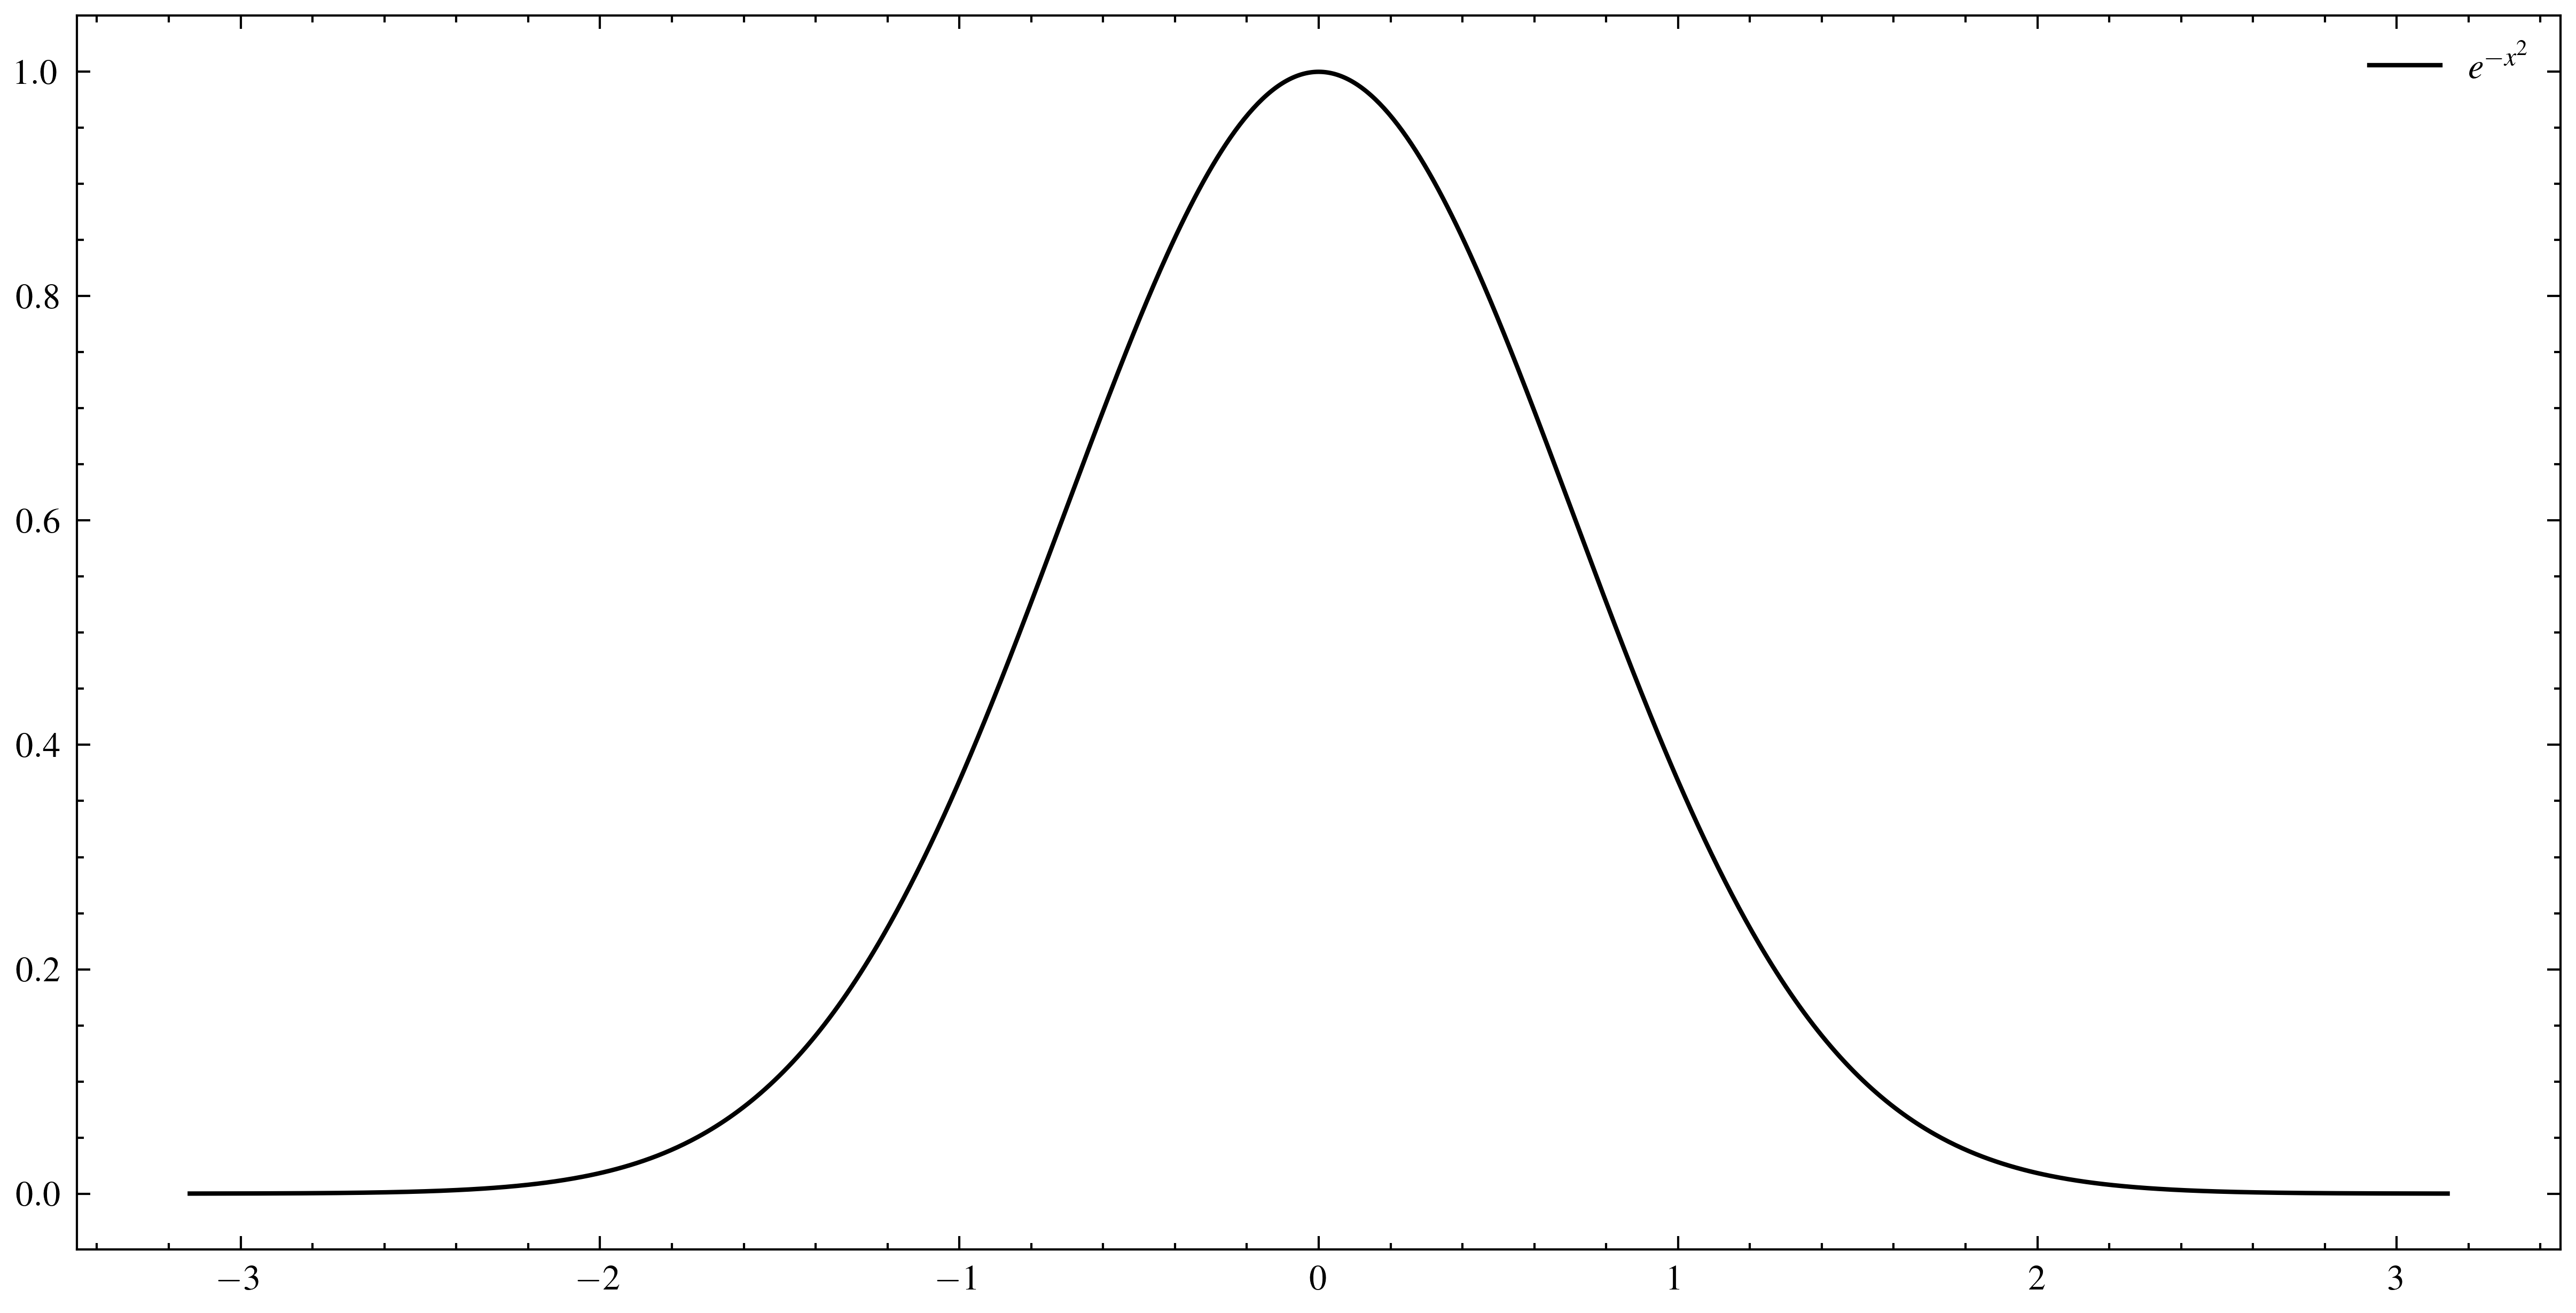

In [8]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$e^{-x^2}$")
plt.legend()
plt.show()


In [9]:
integrate_simpson(f, x_i, x_f, n)


1.7724381183455118

### $$\int_{\frac{a-\pi}{b}}^{\frac{a+\pi}{b}} e^{-(a-bx)^2} \cdot dx$$
for, $$a = 1000, \; b = 0.1$$

In [10]:
a = 1000
b = 0.5


def f(x, a=a, b=b):
    return exp(-(square(a - b * x)))


x_i = (a - pi) / b
x_f = (a + pi) / b
n = 1001


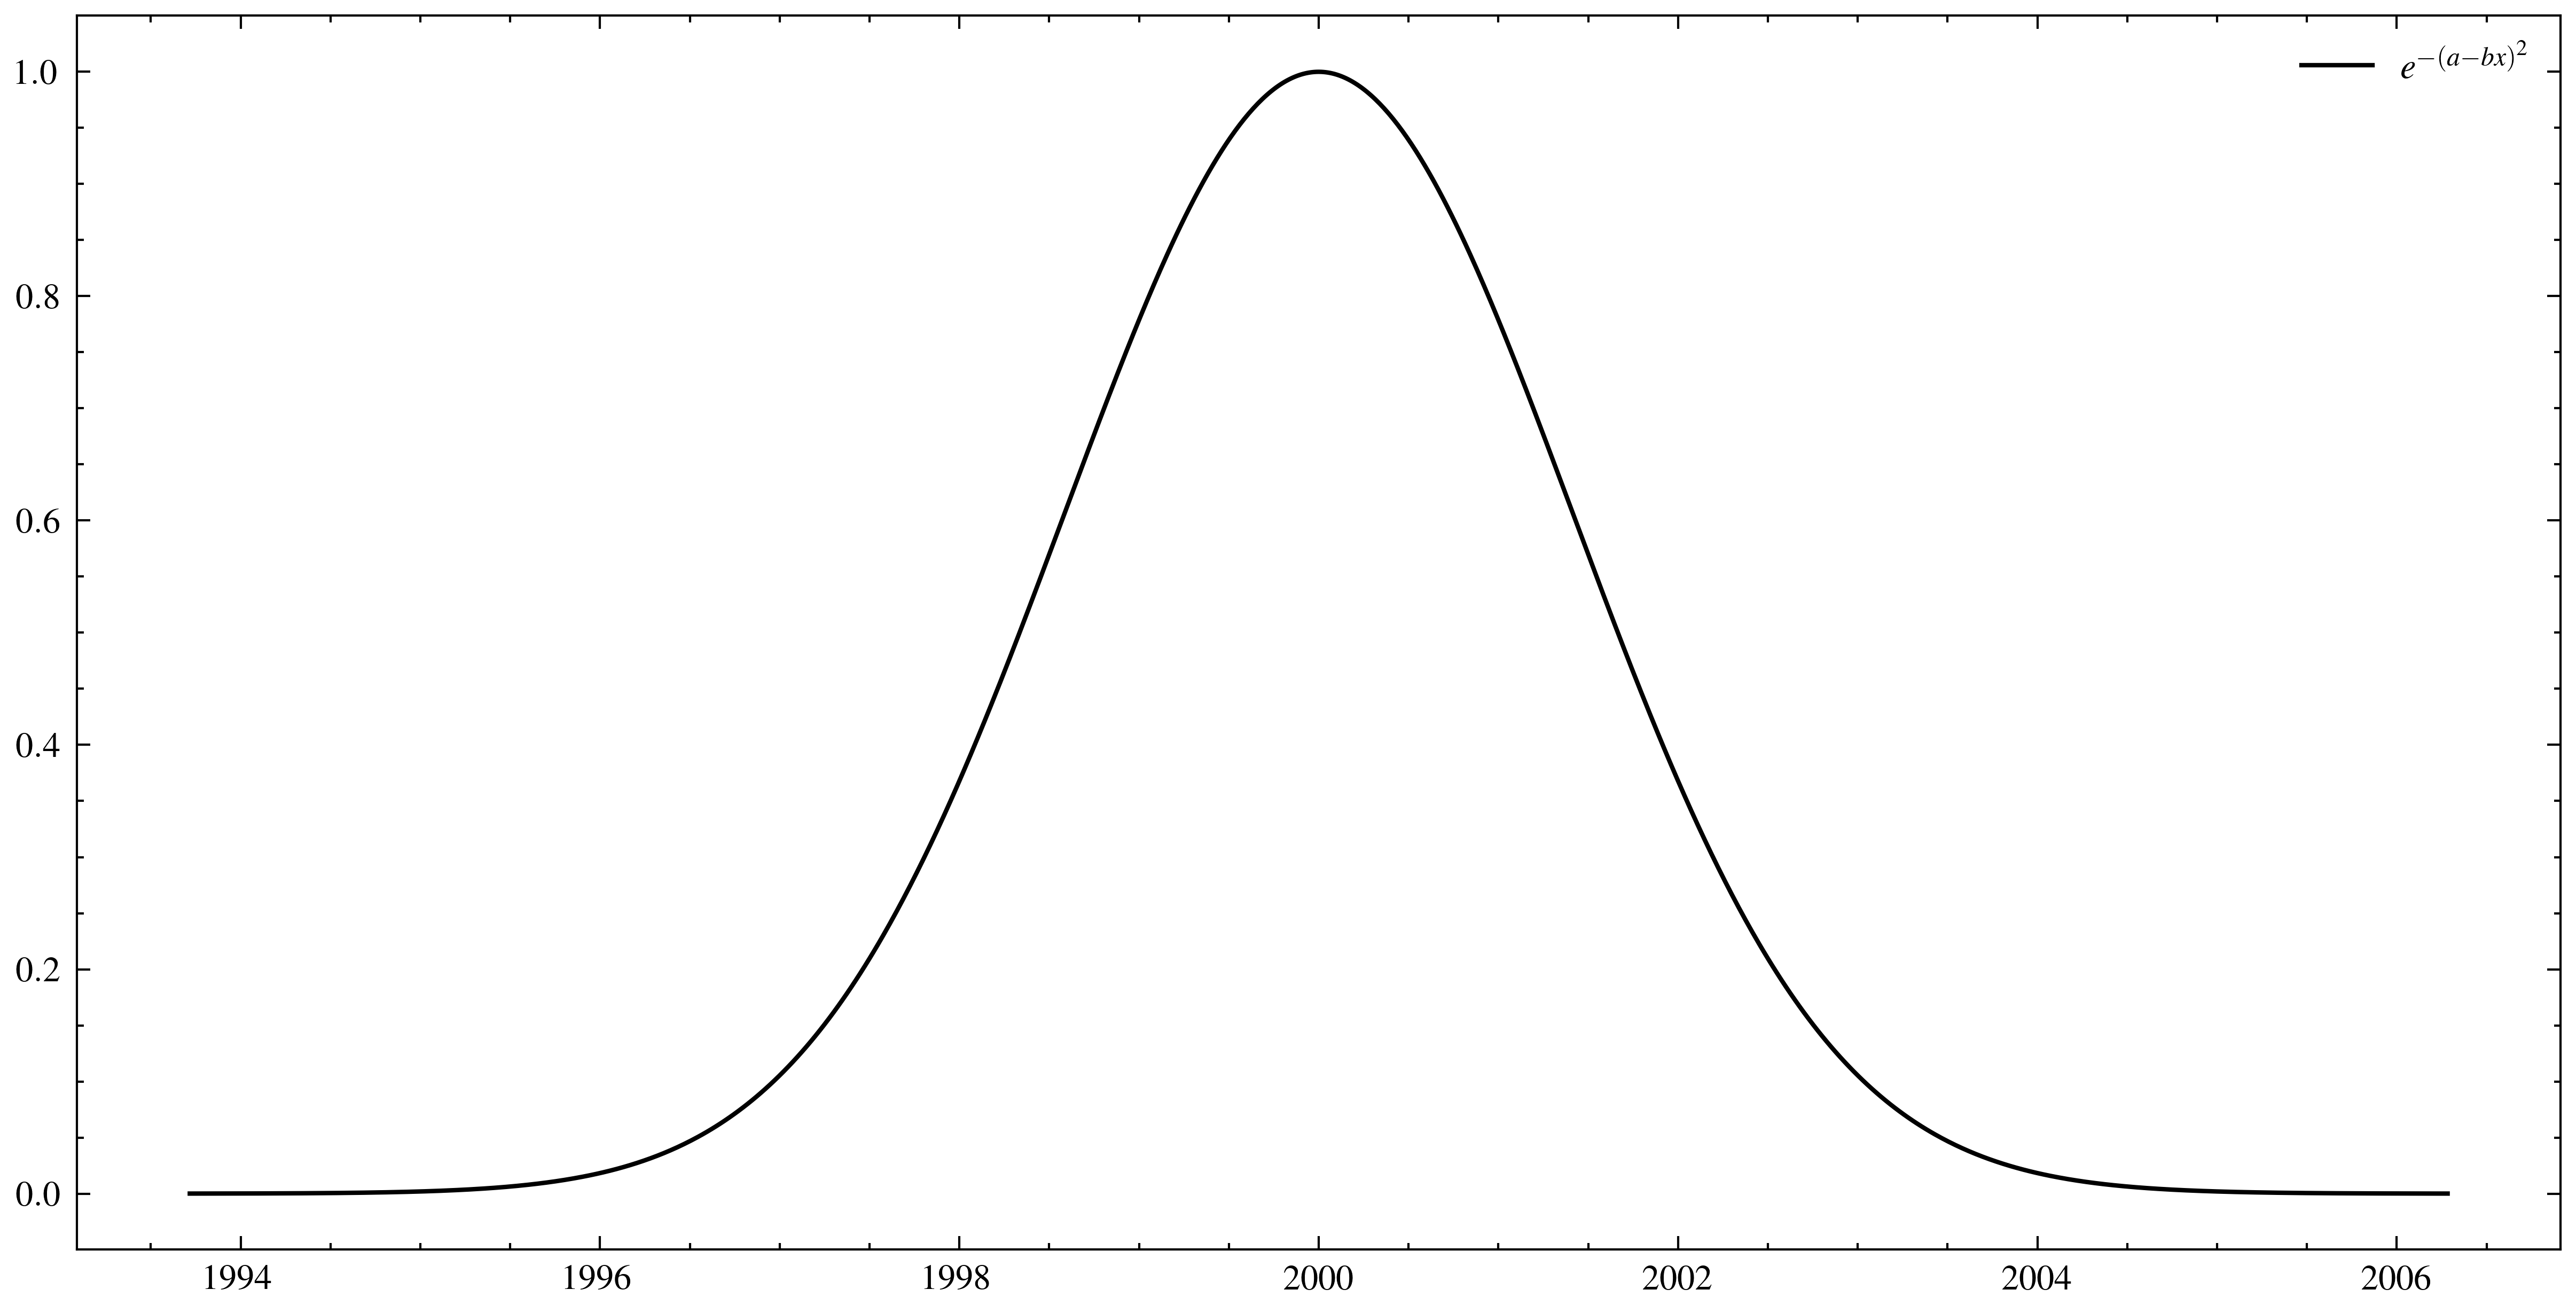

In [11]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$e^{-(a-bx)^2}$")
plt.legend()
plt.show()


In [12]:
integrate_simpson(f, x_i, x_f, n)


3.544876236673206

### $$\int_{-\pi}^{\pi} x^2 e^{-x^2} \cdot dx$$

In [13]:
def f(x):
    return square(x) * exp(-(square(x)))


x_i = - pi
x_f = pi
n = 1001


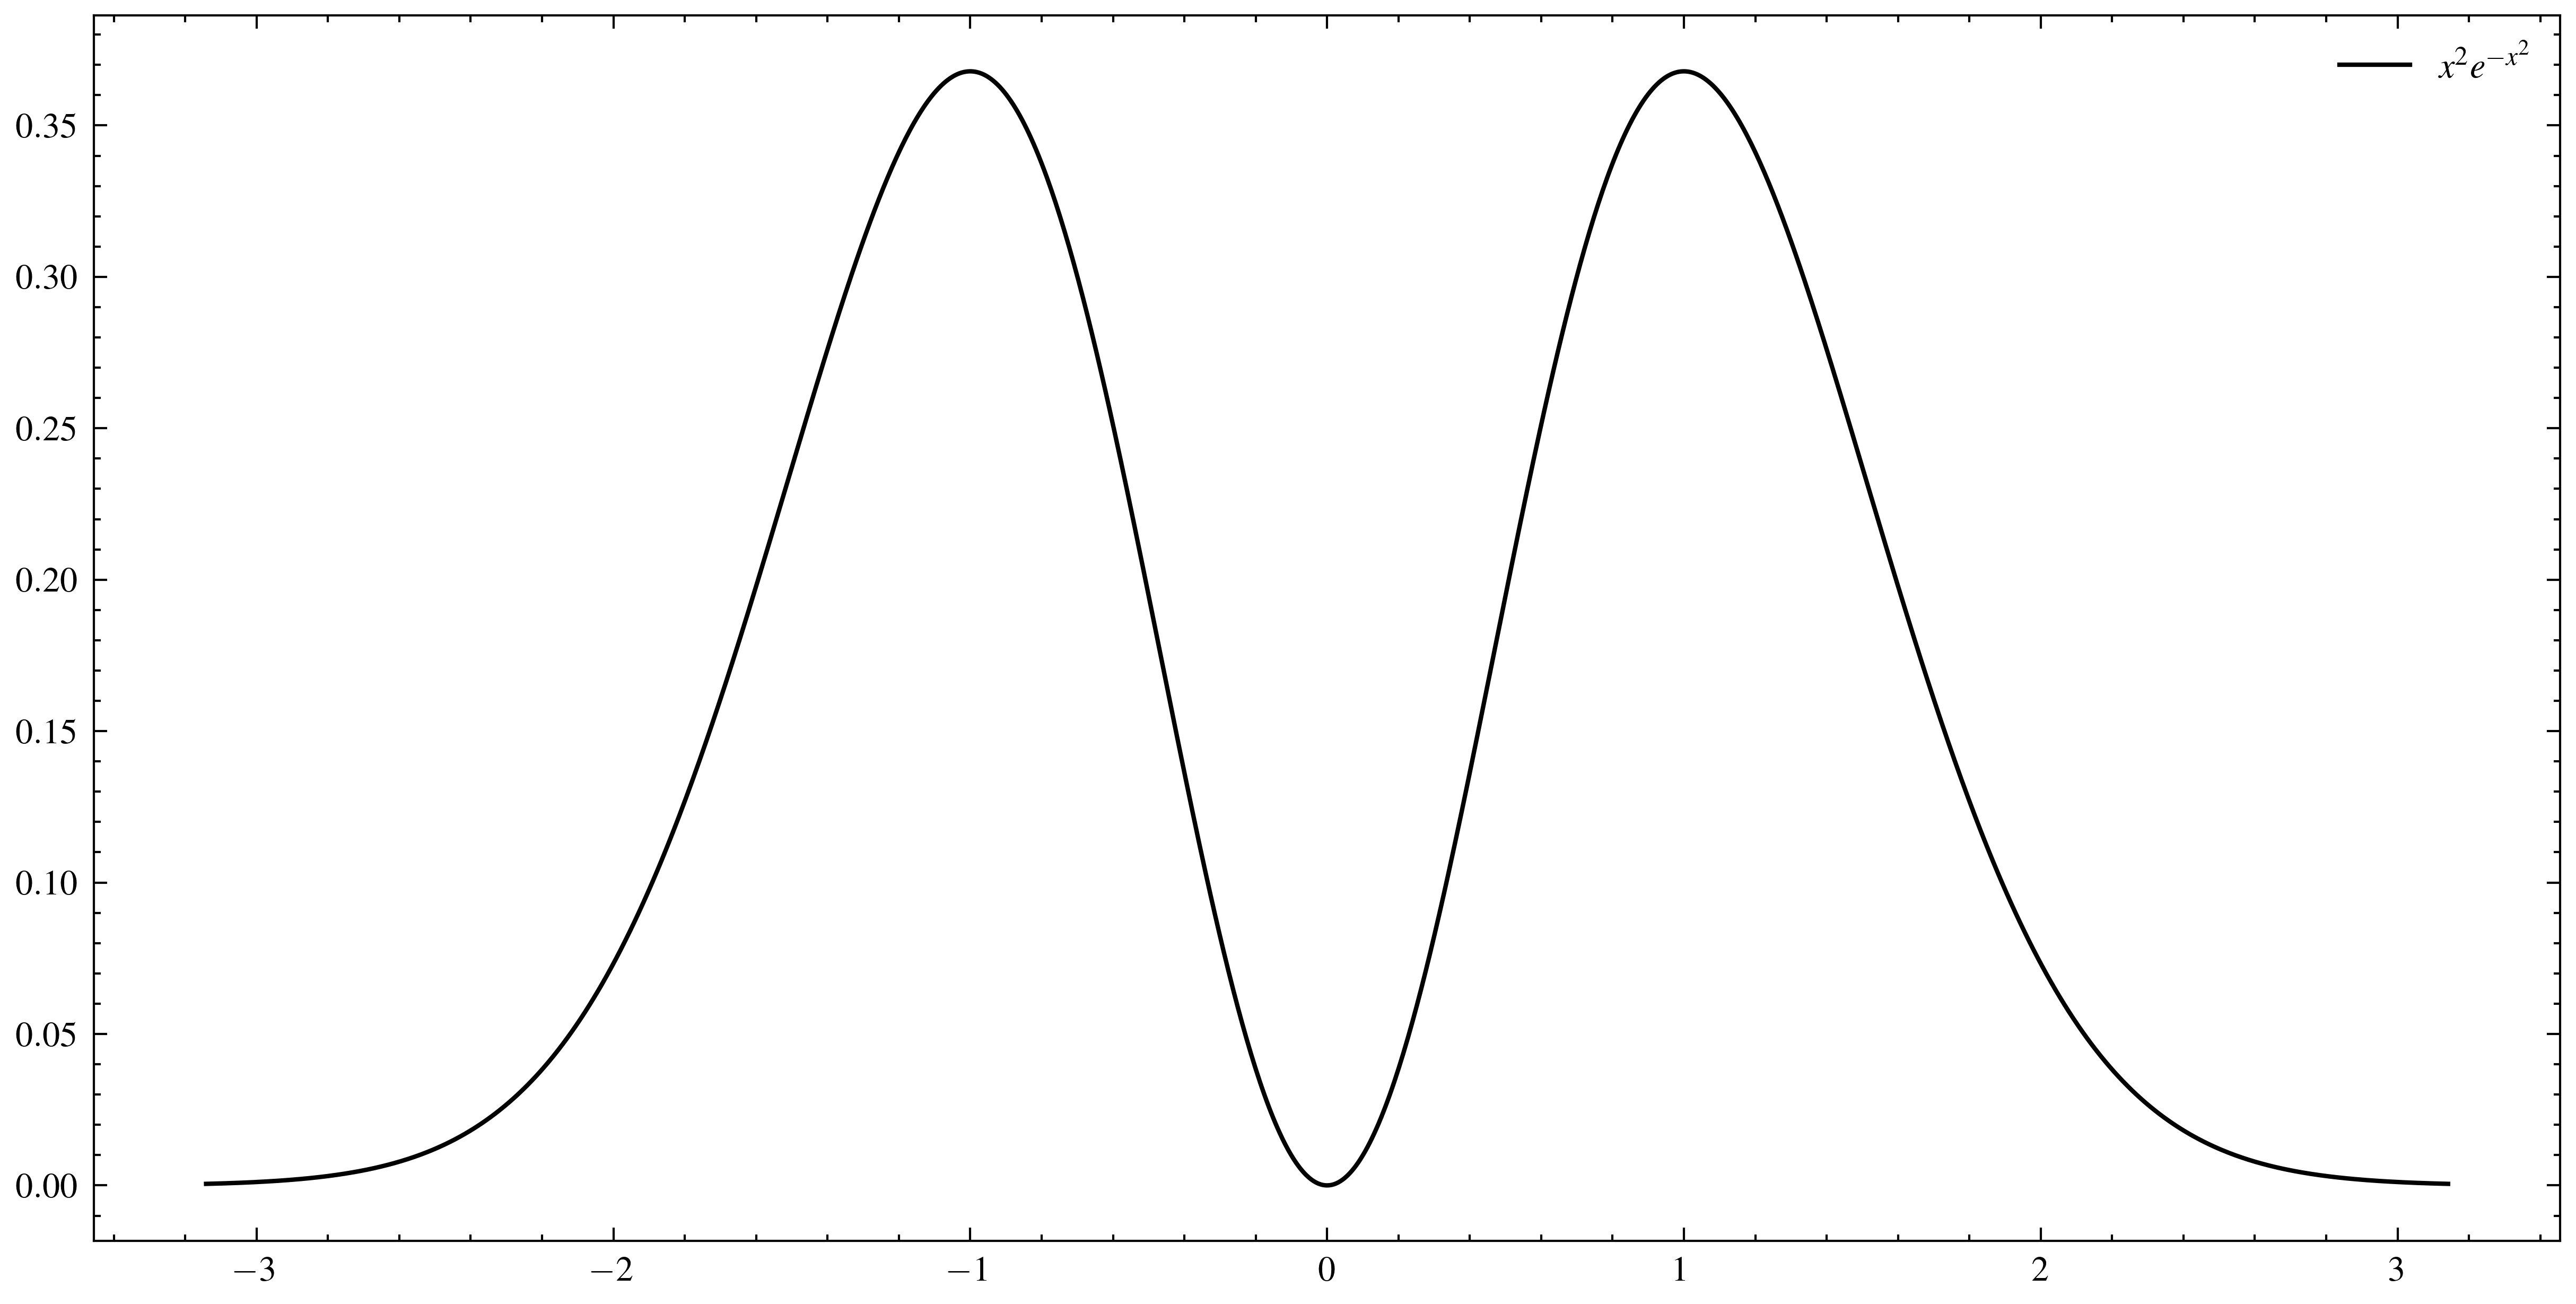

In [14]:
x = generate_points(x_i, x_f, n)
plt.plot(x, f(x), label="$x^2e^{-x^2}$")
plt.legend()
plt.show()


In [15]:
integrate_simpson(f, x_i, x_f, n)


0.8860565659897861